In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
from keras.layers import Dense, Flatten
from keras import Model

In [5]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [6]:
from keras.applications.xception import Xception, preprocess_input

In [7]:
train_datagen =  ImageDataGenerator(
    validation_split=0.15,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    preprocessing_function=preprocess_input,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
        f'gdrive/MyDrive/Léna/cats_and_dogs/train',
        target_size=(300, 300),
        batch_size=16,
        shuffle=True)

test_generator = test_datagen.flow_from_directory(
        f'gdrive/MyDrive/Léna/cats_and_dogs/test',
        target_size=(300, 300),
        batch_size=16,
        shuffle=False)

Found 557 images belonging to 2 classes.
Found 140 images belonging to 2 classes.


# First Model

In [8]:
base_model1 = VGG16(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
for layer in base_model1.layers:
    layer.trainable = False
x = base_model1.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x)

model1 = Model(inputs=base_model1.input, outputs=predictions)
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model1.fit(
    train_generator,
    epochs=5
)

Epoch 1/5
35/35 [==============================] - 41s 900ms/step - loss: 0.5432 - accuracy: 0.7397
Epoch 2/5
35/35 [==============================] - 24s 671ms/step - loss: 0.2100 - accuracy: 0.9084
Epoch 3/5
35/35 [==============================] - 22s 611ms/step - loss: 0.1340 - accuracy: 0.9479
Epoch 4/5
35/35 [==============================] - 22s 628ms/step - loss: 0.1273 - accuracy: 0.9533
Epoch 5/5
35/35 [==============================] - 23s 652ms/step - loss: 0.1088 - accuracy: 0.9551


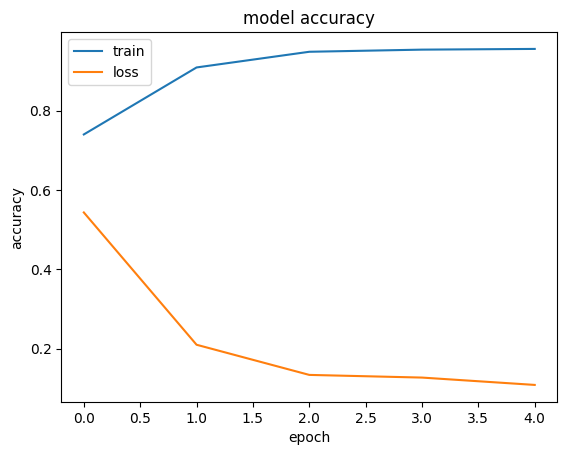

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', "loss"], loc='upper left')
plt.show()

In [11]:
y_pred = model1.predict(test_generator)
y_pred.shape

9/9 [==============================] - 7s 780ms/step


(140, 2)

In [12]:
preds = [1 if pred[0] < 0.5 else 0 for pred in y_pred]

In [13]:
print(classification_report(test_generator.labels, preds))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84        70
           1       0.82      0.87      0.85        70

    accuracy                           0.84       140
   macro avg       0.84      0.84      0.84       140
weighted avg       0.84      0.84      0.84       140



In [14]:
print(accuracy_score(test_generator.labels, preds))
print(f1_score(test_generator.labels, preds))

0.8428571428571429
0.8472222222222222


<Axes: >

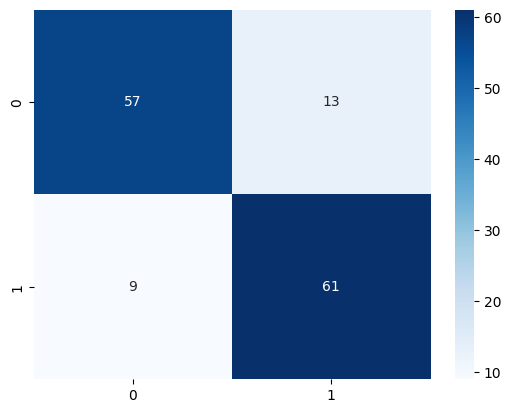

In [15]:
cm = confusion_matrix(test_generator.labels, preds)
sns.heatmap(cm, cmap="Blues", annot=True, fmt="g")

# Second Model

In [16]:
base_model2 = Xception(weights='imagenet', include_top=False, input_shape=(300, 300, 3))
for layer in base_model2.layers:
    layer.trainable = False
x = base_model2.output
x = Flatten()(x)
x = Dense(100, activation='relu')(x)
predictions = Dense(2, activation='softmax', kernel_initializer='random_uniform')(x)

model2 = Model(inputs=base_model2.input, outputs=predictions)
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
history = model2.fit(
    train_generator,
    epochs=5
)

Epoch 1/5
35/35 [==============================] - 29s 646ms/step - loss: 0.5544 - accuracy: 0.9156
Epoch 2/5
35/35 [==============================] - 23s 670ms/step - loss: 0.1301 - accuracy: 0.9749
Epoch 3/5
35/35 [==============================] - 23s 648ms/step - loss: 0.0739 - accuracy: 0.9928
Epoch 4/5
35/35 [==============================] - 22s 642ms/step - loss: 0.0084 - accuracy: 0.9982
Epoch 5/5
35/35 [==============================] - 28s 821ms/step - loss: 0.0209 - accuracy: 0.9910


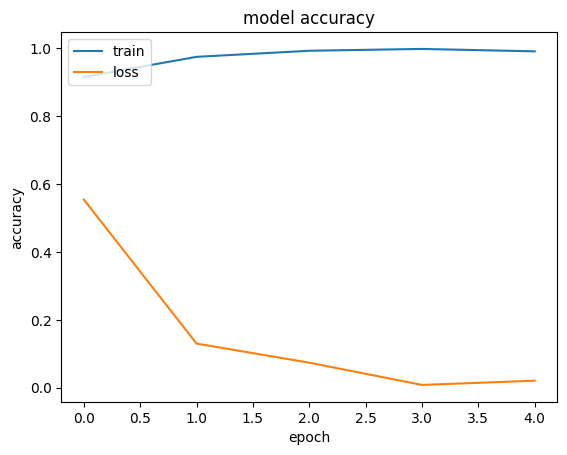

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', "loss"], loc='upper left')
plt.show()

In [19]:
y_pred = model2.predict(test_generator)
y_pred.shape

9/9 [==============================] - 5s 544ms/step


(140, 2)

In [20]:
preds = [1 if pred[0] < 0.5 else 0 for pred in y_pred]

In [21]:
print(classification_report(test_generator.labels, preds))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        70
           1       0.96      1.00      0.98        70

    accuracy                           0.98       140
   macro avg       0.98      0.98      0.98       140
weighted avg       0.98      0.98      0.98       140



In [22]:
print(accuracy_score(test_generator.labels, preds))
print(f1_score(test_generator.labels, preds))

0.9785714285714285
0.9790209790209791


<Axes: >

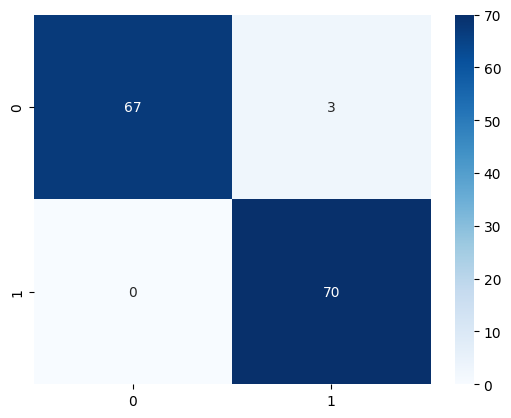

In [23]:
cm = confusion_matrix(test_generator.labels, preds)
sns.heatmap(cm, cmap="Blues", annot=True, fmt="g")

# Comparaison des résultats

Le 2ème modèle (Xception) obtient de meilleurs résultats :
- Meilleure accuracy (0.9786)
- Meilleur F1 score (0.9790)
- Meilleurs taux de faux positifs et faux négatifs